# Primera Entrega del Proyecto Final

Para este proyecto fue seleccionado un set de datos relacionados a una entidad bancaria portuguesa, que data del año 2008 al año 2010. Comprende datos básicos de los clientes y datos de una campaña de marketing, donde se busca como resultado que los mismos accedan a realizar un depósito a plazo fijo.

## Objetivos Generales

Realizar un análisis exploratorio de los datos que se encuentran en dos grupos de variables, unas asociadas a los clientes de la entidad bancaria y la otra a la campaña de marketing.

Entender cuáles son las variables que influyen en que los clientes de la entidad bancaria accedan a realizar depósitos por plazo fijo.

Seleccionar el modelo a utilizar para predecir los resultados según el tipo de cliente y de la campaña de marketing.

## Equipo de Trabajo

*   Alejandro Aziernicki
*   Ángel Tang





## Fuente del Dataset

Este dataset fue seleccionado con la finalidad de poner en práctica los conocimientos adquiridos durante el curso de Ciencia de Datos impartido por CoderHouse. Estos datos poseen diversas variables a partir de las cuales podemos inicalmente realizar un análisis exploratorio de datos e ir descubriendo los métodos que podemos aplicar.

https://archive.ics.uci.edu/ml/datasets/bank+marketing

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

## Variables

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

**Variables asociadas al cliente**

age = Edad

job = Trabajo

marital = estado civil de la persona

education = nivel educativo de la persona

default = crédito en mora

balance = saldo promedio anual, en euros

housing = tiene préstamo hipotecario?

loan = tiene préstamo personal?

**Variables relacionadas con el último contacto de la campaña actual**

contact = tipo de comunicación

day = último día del mes en contacto

month = último mes del año en contacto

duration = duración del último contacto (segundos)

**Otras variables**

campaing = número de contactos realizados durante esta campaña y para este cliente

pdays = número de días que pasaron después de que el cliente fue contactado de una campaña anterior

previous = número de contactos realizados antes de esta campaña para este cliente

poutcome = resultado de la campaña de marketing anterior

**Variable Objetivo**

y = el cliente se ha suscrito a un depósito a plazo?

## Importación de Librerías

In [ ]:
## se importan las liberías y se deja comentado lo relacionado al pandas_profiling ya que provoca un bug que no permite visualizar las graficas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
#import pandas_profiling

In [ ]:
#!pip install --upgrade pandas_profiling --user

In [ ]:
#!pip install markupsafe==2.0.1

### Lectura y visualización del dataset

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1lPBlJngRHB7F8OGSL-ujrzoqq8Ifmxpe&authuser=0&export=download', sep= ";" )
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

## Estadísticas básicas

En las siguientes dos líneas de código se utilizan funciones para obtener un poco de información sobre el dataframe, como el recuento de datos, promedio, variación, etc. Mientras, con la siguiente función podemos ver detalles más generales sobre el tipo de dato de las columnas, si tienen datos nulos o no.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


El dataset contiene información de una campaña de marketing bancaria, consta de 45211 filas y 17 variables, de las cuales 7 variables son numéricas, de tipo entero, y 10 son de tipo objeto o categóricas. Además, se puede observar que el dataset no presenta ningún dato faltante.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


A partir de estos datos podemos observar que existe un sesgo hacia la derecha en cinco de las siete variables numéricas.

Por otro lado, podemos apreciar las estadísticas básicas de las variables categóricas a continuación:

In [ ]:
list_cat=['job','marital','education','default','housing','loan','contact','month','poutcome', 'y']
df[list_cat].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Podemos observar el número de observaciones por variable, donde encontramos que existen 12 tipos de trabajos, de los cuales el más frecuente es el de blue-collar (obreros), la mayoría está casada, con nivel secundario, sin deudas, con préstamos hipotecarios pero sí con préstamos personales. Durante la última campaña, el contacto fue en su mayoría por teléfono celular, en el mes de mayo, y el resultado es desconocido.

## Análisis univariado



### Variable 'job'

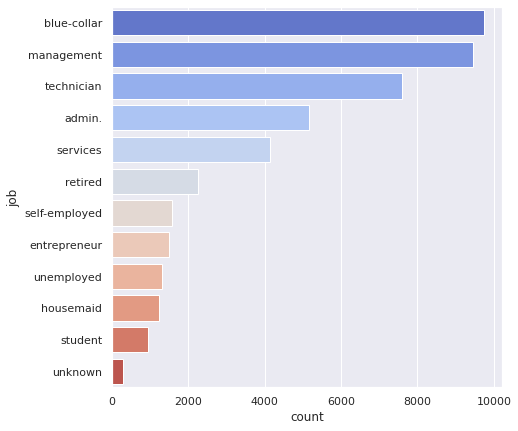

In [ ]:
sns.set_theme(palette = "coolwarm")
figure,ax=plt.subplots(figsize=(7,7))
sns.countplot(y='job', order=df['job'].value_counts().index, data=df, palette='coolwarm')
#ax.set_ylabel('Empleos')
#ax.set_xlabel('Conteo')
#ax.set_title('Recuento para la variable empleo')
plt.show()

### Variable 'education'

Definimos la variable "edu" como la cuenta de valores de la columna education del dataframe para asi poder usarla en el siguiente gráfico de anillos.

Se utiliza la funcion set_theme para cambiar los colores predeterminados, luego con el plt.pie se crea el grafico de torta indicandole los datos, etiquetas y se usa el parámetro "autopct='%.0f%%'" para poder mostrar los porcentajes en la gráfica.


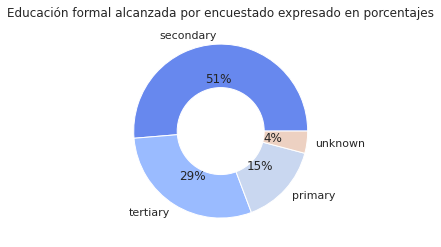

In [ ]:
sns.set_theme(palette = "coolwarm")
edu = df['education'].value_counts()
plt.title('Educación formal alcanzada por encuestado expresado en porcentajes')
plt.pie(edu,labels = edu.index, autopct='%.0f%%')

#con la siguiente funcion se crea el circulo central para que sea un gráfico de anillos 
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


### Variable 'marital'

Realizamos un gráfico de barras representando el estado civil de los encuestados.

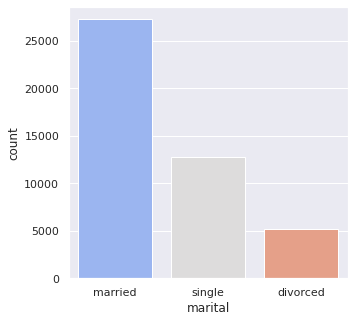

In [ ]:
figura, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='marital', data=df, palette='coolwarm')
plt.show()

### Variable 'Balance'

Creamos un boxplot de la totalidad de los datos en el cual se pueden observar datos atipicos. 

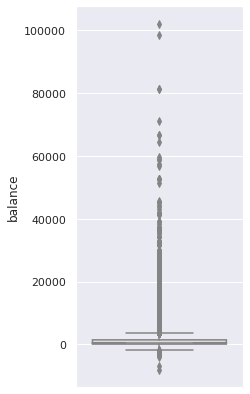

In [ ]:
plt.figure(figsize=(3,7))
sns.boxplot(y=df['balance'], notch = True, palette='coolwarm')
plt.show()

Como resultado observamos una cantidad considerable de datos atípicos, es por eso que creamos otro boxplot utilizando los mismos datos pero ocultando los valores atipicos para poder observar el comportamiento de las entradas mas recurrentes, y al mismo tiempo visualizamos estos datos en un histograma de frecuencias.


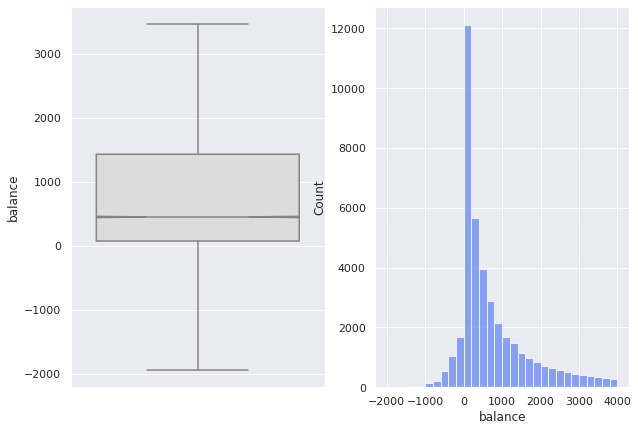

In [ ]:
figure, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,7))
sns.boxplot(y=df['balance'], notch = True, showfliers = False, ax=axes[0], palette='coolwarm')
sns.histplot(x='balance', data=df, binrange=(-2000, 4000), binwidth=200, ax=axes[1], palette='coolwarm') 
plt.show()

### Variable 'poutcome'

Creamos un dataframe con la variable poutcome que indica  el resultado de la anterior campaña de marketing. Renombramos la variable poutcome a frec_abs y
usamos la funcion .cumsum() para generar una nueva columna representando la frecuencia absoluta acumulada.

In [ ]:
frec = df["poutcome"].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={'poutcome':'Frec_abs'},inplace=True)
frec_df['Frec_abs_acum2'] = frec_df["Frec_abs"].cumsum()
frec_df

,Frec_abs,Frec_abs_acum2
unknown,36959,36959
failure,4901,41860
other,1840,43700
success,1511,45211


Calculamos la Frecuencia Relativa en % y la Frecuencia Relativa en % acumulada


In [ ]:
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/frec_df['Frec_abs'].sum(),4)
frec_df["frec_rel_%_acum"] = frec_df["frec_rel_%"].cumsum()
frec_df

,Frec_abs,Frec_abs_acum2,frec_rel_%,frec_rel_%_acum
unknown,36959,36959,81.7478,81.7478
failure,4901,41860,10.8403,92.5881
other,1840,43700,4.0698,96.6579
success,1511,45211,3.3421,100.0000


Podemos observar del anterior df que de 45211 consumidores solo 1511(3,3421%) han accedido a plazos fijos en el banco, mientras que el 10.8403% han expresado su negación a hacerlo.

## Análisis Bivariado

### variables 'job' vs 'age'

Realizamos un promedio por edad y se organizamos los valores de menor a mayor para su utilización en el próximo gráfico.


In [ ]:
eduage = df.groupby('job')['age'].mean().sort_values()
eduage

job
student          26.542644
services         38.740250
admin.           39.289886
technician       39.314598
blue-collar      40.044081
management       40.449567
self-employed    40.484484
unemployed       40.961627
entrepreneur     42.190989
housemaid        46.415323
unknown          47.593750
retired          61.626767
Name: age, dtype: float64

Creamos un barplot con la librería de Seaborn de la variable jon y el promedio de edad

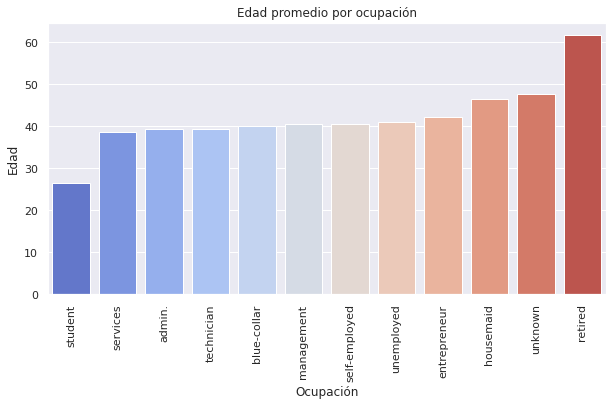

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot (x=eduage.index, y=eduage, palette='coolwarm')
ax.set_xlabel('Ocupación')
ax.set_ylabel('Edad')
ax.set_title('Edad promedio por ocupación')
plt.xticks(rotation=90)
plt.show()


Nos encontramos que las edades promedio van de 26 años aproximadamente para estudiantes, por encima de 60 años para los retirados o jubilados, y alrededor de 40 años para el resto de las ocupaciones.

### Variables 'job' vs 'balance'

Realizamos un análisis numérico vs categórico del promedio  de balance por job (ocupación).

In [ ]:
df.groupby('job')['balance'].mean().sort_values()

job
services          997.088108
blue-collar      1078.826654
admin.           1135.838909
technician       1252.632092
student          1388.060768
housemaid        1392.395161
entrepreneur     1521.470074
unemployed       1521.745971
self-employed    1647.970868
management       1763.616832
unknown          1772.357639
retired          1984.215106
Name: balance, dtype: float64

Representamos estos datos distribudos en un gráfico de caja y bigotes.

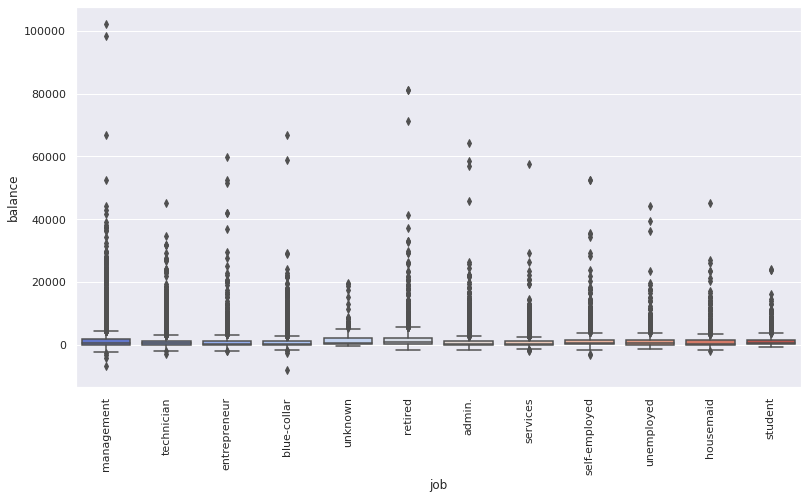

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(y = 'balance', x = 'job', data = df, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Apreciamos que para todas la profesiones existen valores atípicos, por lo que excluimos estos valores de la siguiente gráfica para observar mejor la distribución recurrente de estas variables.

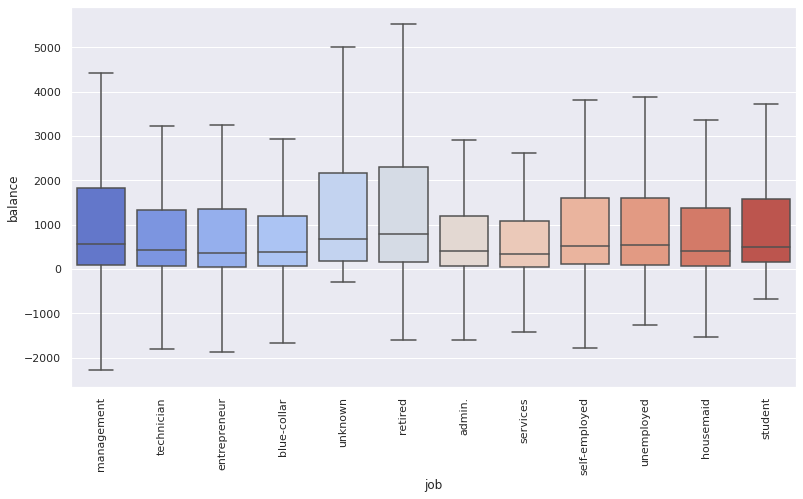

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(y = 'balance', x = 'job', showfliers = False, data = df, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Nos encontramos con que el saldo con mayor rango se encuentra entre los clientes retirados o jubilados, mientras que los que tienen un mejor rango son los que pertenecen al ítem blue-collar, que corresponde a la clase obrera.

### Variables 'campaing' vs 'poutcome'

Creamos un crosstab utilizando las variables campaing (número de contactos realizados durante esta campaña y para este cliente) y por el otro lado el resultado de esta campaña, a esta misma tabla se le agregó una variable representando la frecuencia absoluta por campaña y otra mostrando la frecuencia relativa por variable "success".

In [ ]:
campant = pd.crosstab(df.campaign, df.poutcome)
campant['frec_abs'] = campant.sum(axis = 1)
campant["frec_rel_success_%"] = round(100 * campant["success"]/campant['frec_abs'].sum(),4)
campant

poutcome,failure,other,success,unknown,frec_abs,frec_rel_success_%
campaign,,,,,,
1,2458,718,837,13531,17544,1.8513
2,1374,500,402,10229,12505,0.8892
3,500,262,149,4610,5521,0.3296
4,242,131,51,3098,3522,0.1128
5,140,86,30,1508,1764,0.0664
6,87,55,21,1128,1291,0.0464
7,52,34,11,638,735,0.0243
8,22,24,8,486,540,0.0177
9,10,13,1,303,327,0.0022


### Variables 'Job' y 'balance'

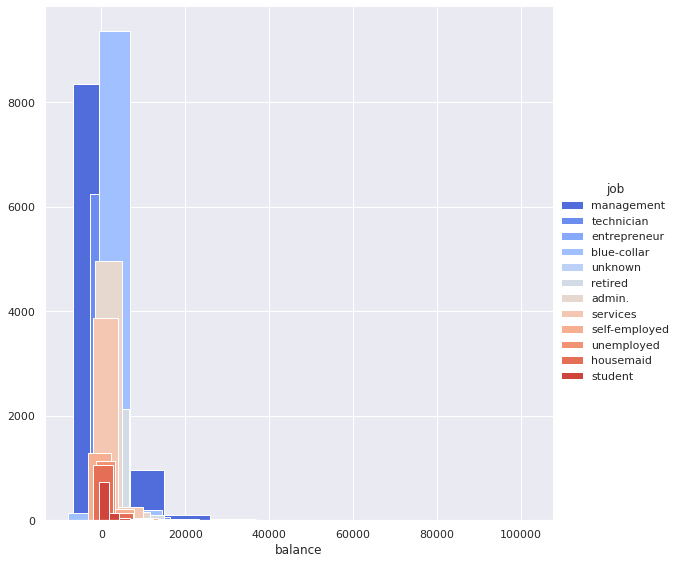

In [ ]:
#Se realiza FacetGrid con la variable balance y el hue en job
sns.FacetGrid(df, hue = 'job', height = 8, palette='coolwarm').map(plt.hist,'balance').add_legend();
plt.show()

### Variables 'y' vs 'age'

Empezamos a realizar análisis de las variables con respecto al target (variable 'y'), comenzando con su relación con la variable 'age'. 
Creamos un boxplot y un histograma de frecuencias.

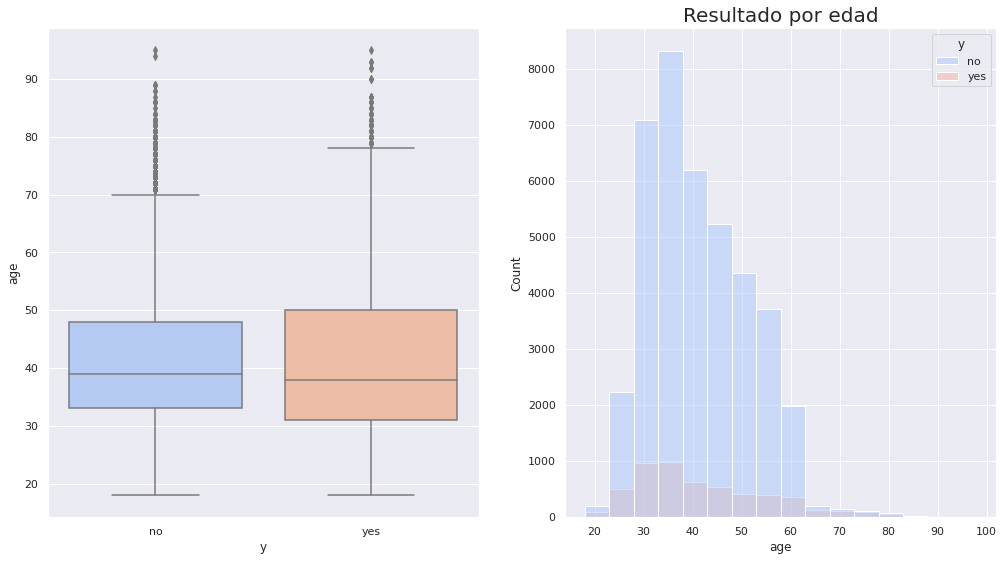

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 9))
plt.title('Resultado por edad', fontsize = 20)
sns.boxplot(x=df['y'], y=df['age'], palette = 'coolwarm', ax=axes[0])
sns.histplot(x='age', hue='y', data=df, palette='coolwarm', binwidth=5, ax=axes[1])
plt.show()

Observamos no existe una gran influencia de la edad en la toma de decisión, notamos cierta tendencia a que la mayoría de las personas que accedieron al depósito de plazo fijo están en un rango de edad de 30 a 50 años.

### Variables 'job' vs 'y'

Buscamos la relación entre la ocupación (variable 'job') y la variable target ('y'), utilizando el gráfico de histograma de frecuencias.

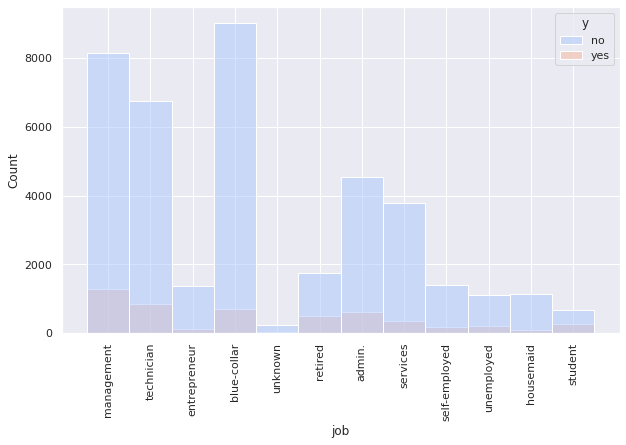

In [ ]:
figure, ax= plt.subplots(figsize=(10,6))
sns.histplot(x='job', hue='y', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Observamos que quienes acceden a realizar los depósitos a plazo fijo es el de gerente y de técnicos. Mientras que los que menos accedieron fueron los desempleados, emprendedores y amas de casa.

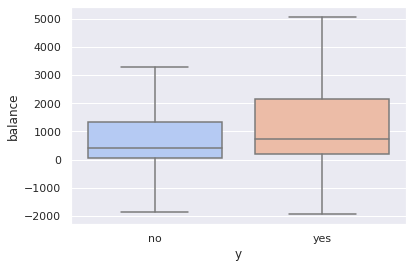

In [ ]:
sns.boxplot(x=df['y'], y=df['balance'], palette = 'coolwarm', showfliers = False)

## Análisis Multivariado



### Variables 'y', 'duration' y'campaign' 

Comenzamos a observar la relación entre las variables que tienen que ver con la campaña y la variable target. En este caso ubicamos la variable que indica la cantidad de veces que se han contactado con el cliente (campaing), la duración del contacto anterior (duration) y el resultado si accedió o no al depósito por plazo fijo (y).

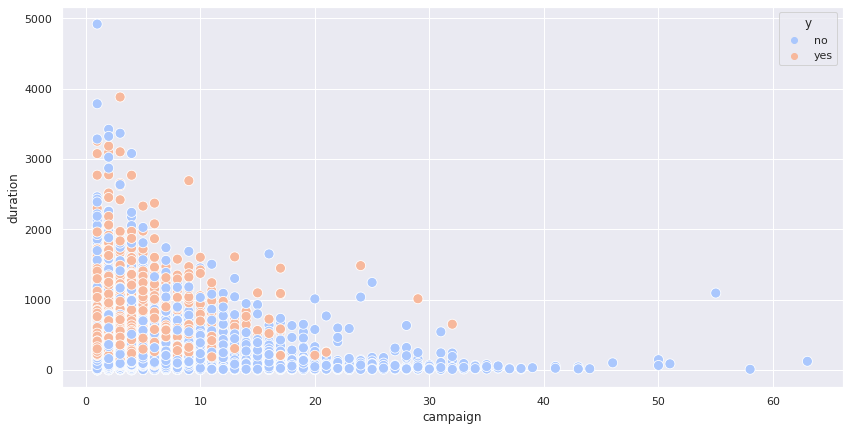

In [ ]:
figure, ax = plt.subplots(figsize=(14,7))
sns.scatterplot(y='duration', x='campaign', hue='y', data=df, s=100, palette='coolwarm')
plt.show()

Observamos que existe cierta relación entre estas variables, ya que mientras mayor es la duración del contacto y menor es el número de veces contactado, existen más casos en los que acceden a realizar el depósito en plazo fijo.

### Variables 'y', 'poutcome' y 'age'

Realizamos un FacetGrid comparando la variable 'y' (target del dataset) y 'poutcome' (resultado de la Anterior campaña de marketin) discriminados por edad


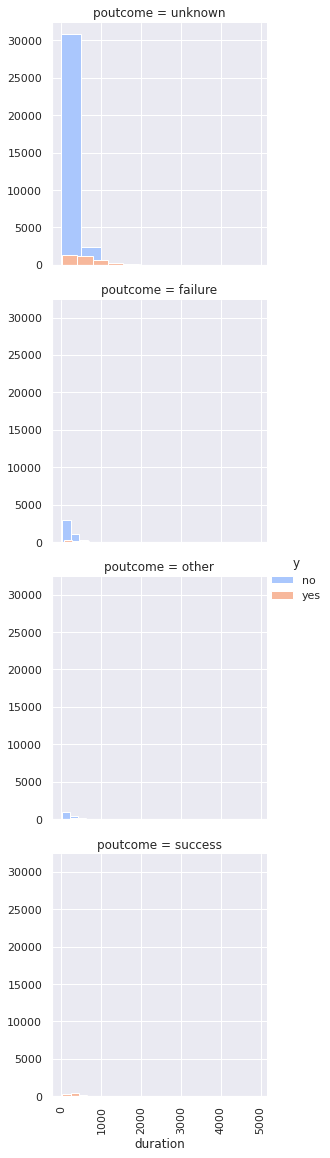

In [ ]:
g = sns.FacetGrid(df,hue = 'y', height = 4, row = 'poutcome', palette='coolwarm')
g.map(plt.hist,'duration').add_legend()
plt.xticks(rotation=90)
plt.show()

### Variables 'previous', 'y', 'contact' y 'education'

Realizamos un pointplot con el fin de ver si el tipo de contacto y la cantidad de veces que hubo contacto con el cliente influye en el resultado de la campañana actual(si ingresa su dinero en un plazo fijo) ademas de discriminar los graficos por tipo de educacion.

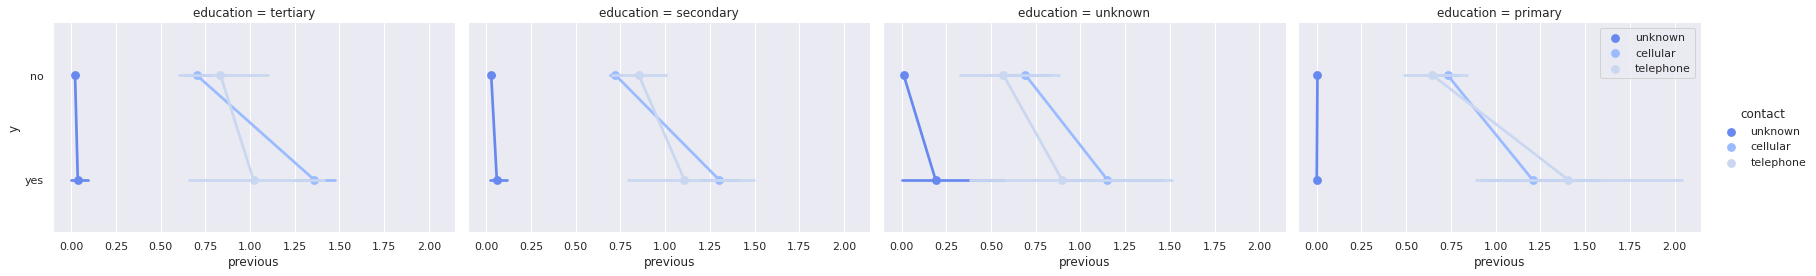

In [ ]:
sns.catplot(x="previous", y="y", height=4, aspect=1.5, hue="contact",col="education", kind="point",data=df)
plt.legend()
plt.show()

### Variable 'y' vs todas las variables numéricas

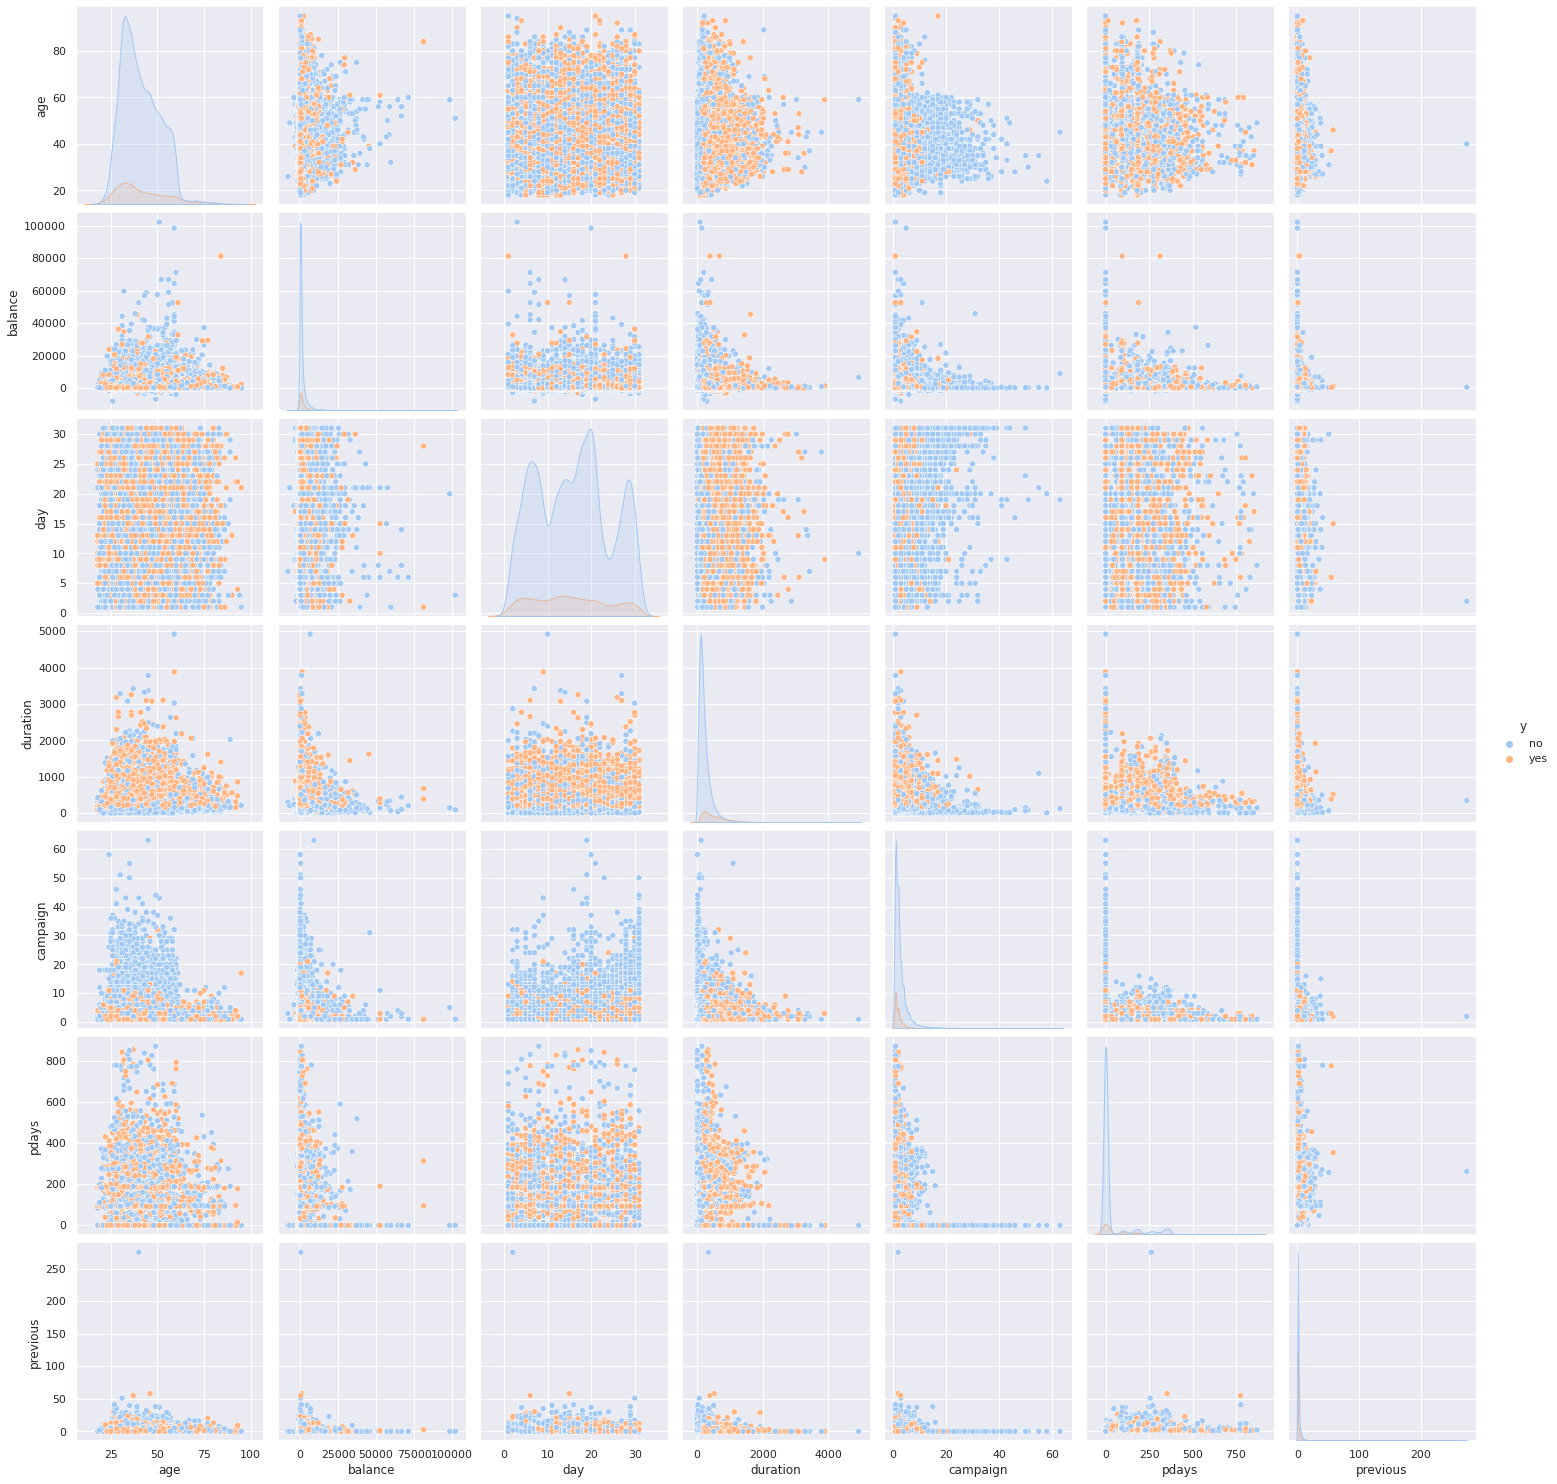

In [ ]:
#Se crea un pairplot con la variable y(target)
sns.pairplot(df,hue = 'y' , height = 3 , palette = 'pastel')

## Dejamos esta celda comentada ya que genera un error en la visualización de gráficos

# Segunda Entrega del Proyecto Final


## Ajuste de Variables (encoding)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import preprocessing



Seleccionamos de nuestro set datos las columnas exceptuando la variable objetivo 'y' y la guardamos en la variable X

In [ ]:
X = df.drop(columns=["y"])
y = df.y

In [ ]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [ ]:
enc = OrdinalEncoder()

In [ ]:
edu=['unknown','primary', 'secondary','tertiary']

In [ ]:
mes=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov','dec']

In [ ]:
enc = OrdinalEncoder(categories=[edu, mes])

In [ ]:
pd.DataFrame(enc.fit_transform(X[['education', 'month']]))


,0,1
0,3.0,4.0
1,2.0,4.0
2,2.0,4.0
3,0.0,4.0
4,0.0,4.0
...,...,...
45206,3.0,10.0
45207,1.0,10.0
45208,2.0,10.0
45209,2.0,10.0


In [ ]:
X[['education', 'month']]=enc.fit_transform(X[['education','month']])

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
X.job=le.fit_transform(df['job'])
X.marital=le.fit_transform(df['marital'])
X.contact=le.fit_transform(df['contact'])
X.poutcome=le.fit_transform(df['poutcome'])

Ya que poseemos variables categóricas, utilizamos el método de pandas .get_dummies() para poder entrenar el modelo, este transforma las variables categóricas clásicas a variables dummy, la cual toma el valor 0 o 1 para indicar la ausencia/presencia de un valor categórico. 

In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default_yes,housing_yes,loan_yes
0,58,4,1,3.0,2143,2,5,4.0,261,1,-1,0,3,0,1,0
1,44,9,2,2.0,29,2,5,4.0,151,1,-1,0,3,0,1,0
2,33,2,1,2.0,2,2,5,4.0,76,1,-1,0,3,0,1,1
3,47,1,1,0.0,1506,2,5,4.0,92,1,-1,0,3,0,1,0
4,33,11,2,0.0,1,2,5,4.0,198,1,-1,0,3,0,0,0


In [ ]:
y = pd.get_dummies(y, drop_first=True)
y.head()

,yes
0,0
1,0
2,0
3,0
4,0


Importamos de la libreria Scikit-Learn el módulo para separar en train y test

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Utilizamos un 30% de los datos para test y un 70% para el train

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.yes)

De la librería de Scikit-Learn importamos los modulos necesarios y creamos el modelo, para esto lo guardamos en la variable model y lo entrenamos

# Entrenamiento del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import sklearn.metrics as metrics


## Árboles Aleatorios

### Primer Entrenamiento

Entrenamiento realizando el balance de clases con el parámetro class_weight="balanced".


In [ ]:
rfc= RandomForestClassifier()

In [ ]:
model1 = RandomForestClassifier(random_state=11, n_estimators=300, max_depth=12,
                                class_weight="balanced", max_features="sqrt",
                                max_samples=2/3, 
                                oob_score=True)
model1.fit(X_train, y_train.yes)
y_test_pred = model1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     11969
           1       0.49      0.74      0.59      1595

    accuracy                           0.88     13564
   macro avg       0.73      0.82      0.76     13564
weighted avg       0.91      0.88      0.89     13564



In [ ]:
cm = confusion_matrix(y_test,y_test_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[10728  1241]
 [  415  1180]]


In [ ]:
test_precision1 = precision_score(y_test, y_test_pred)
test_recall_score1 = recall_score(y_test, y_test_pred)

In [ ]:
test_recall_score1

0.7398119122257053

In [ ]:
recall_score(y_test, y_test_pred)

0.7398119122257053

### Segundo entrenamiento



Entrenamiento realizado con el método SMOTE, el cual aumenta el número de muestras de la clase minoritaria de forma sintética (oversampling).

In [ ]:
model2 = RandomForestClassifier(random_state=11, n_estimators=300, max_depth=12,
                                max_features="sqrt",
                                max_samples=2/3, 
                                class_weight="balanced",
                                oob_score=True)
model2.fit(X_train_res, y_train_res)
y_test_pred2 = model2.predict(X_test)
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print(metrics.classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     11969
           1       0.49      0.71      0.58      1595

    accuracy                           0.88     13564
   macro avg       0.72      0.81      0.75     13564
weighted avg       0.90      0.88      0.89     13564



In [ ]:
y_train_res.value_counts()

0    27953
1    27953
Name: yes, dtype: int64

In [ ]:
cm = confusion_matrix(y_test,y_test_pred2)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[10795  1174]
 [  463  1132]]


In [ ]:
test_precision2 = precision_score(y_test, y_test_pred2)
test_recall_score2 = recall_score(y_test, y_test_pred2)

In [ ]:
test_recall_score2

0.709717868338558

### Tercer Entrenamiento

Entrenamiento disminuyendo las muestras (subsampling) de la clase mayoritaria para igualarla a la clase minoritaria.

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_train_res3, y_train_res3 = under_sampler.fit_resample(X_train, y_train)

In [ ]:
y_train_res3.value_counts()

yes
0      3694
1      3694
dtype: int64

In [ ]:
model3 = RandomForestClassifier(random_state=11, n_estimators=500, max_depth=15,
                                max_features="sqrt",
                                max_samples=2/3, 
                                oob_score=True,
                                )
model3.fit(X_train_res3, y_train_res3.yes)
y_test_pred3 = model3.predict(X_test)
test_accuracy3 = accuracy_score(y_test, y_test_pred3)
print(metrics.classification_report(y_test, y_test_pred3))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     11969
           1       0.39      0.90      0.55      1595

    accuracy                           0.83     13564
   macro avg       0.69      0.86      0.72     13564
weighted avg       0.91      0.83      0.85     13564



In [ ]:
cm = confusion_matrix(y_test,y_test_pred3)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[9771 2198]
 [ 166 1429]]


In [ ]:
test_precision3 = precision_score(y_test, y_test_pred3)
test_recall_score3 = recall_score(y_test, y_test_pred3)

In [ ]:
test_recall_score3

0.8959247648902822

### Cuarto entrenamiento

En este entrenamiento se aplica en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset.



In [ ]:
from imblearn.combine import SMOTETomek 

In [ ]:
os_us = SMOTETomek()
X_train_res4, y_train_res4 = os_us.fit_resample(X_train, y_train)

In [ ]:
model4 = RandomForestClassifier(random_state=11, n_estimators=500, max_depth=15,
                                max_features="sqrt",
                                max_samples=2/3, 
                                oob_score=True)
model4.fit(X_train_res4, y_train_res4.yes)
y_test_pred4 = model4.predict(X_test)
test_accuracy4 = accuracy_score(y_test, y_test_pred4)
print(metrics.classification_report(y_test, y_test_pred4))


              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11969
           1       0.52      0.69      0.59      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.80      0.76     13564
weighted avg       0.90      0.89      0.89     13564



In [ ]:
cm = confusion_matrix(y_test,y_test_pred4)
print("Matriz de confusión:")
print(cm)
print(test_accuracy4)

Matriz de confusión:
[[10939  1030]
 [  495  1100]]
0.8875700383367738


In [ ]:
test_precision4 = precision_score(y_test, y_test_pred4)
test_recall_score4 = recall_score(y_test, y_test_pred4)

In [ ]:
test_recall_score4

0.6896551724137931

## Regresión Logística

In [ ]:
X2=X.copy()

In [ ]:
X2.drop(columns='pdays')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=0)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train2)
X_test_minmax = min_max_scaler.fit_transform(X_test2)

### Primer Entrenamiento

Entrenamiento realizando el balance de clases con el parámetro class_weight="balanced".


In [ ]:
regresion_logistica = LogisticRegression(class_weight='balanced')

In [ ]:
regresion_logistica.fit(X_train_minmax, y_train2.yes)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced')

In [ ]:
y_test_pred5 = regresion_logistica.predict(X_test_minmax)
test_accuracy5 = accuracy_score(y_test, y_test_pred5)
print(metrics.classification_report(y_test2, y_test_pred5))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78     11969
           1       0.26      0.91      0.40      1595

    accuracy                           0.68     13564
   macro avg       0.62      0.78      0.59     13564
weighted avg       0.90      0.68      0.74     13564



In [ ]:
cm = confusion_matrix(y_test,y_test_pred5)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[7769 4200]
 [ 146 1449]]


In [ ]:
test_precision5 = precision_score(y_test, y_test_pred5)
test_recall_score5 = recall_score(y_test, y_test_pred5)

In [ ]:
test_recall_score5

0.9084639498432602

### Segundo Entrenamiento

Entrenamiento realizando oversampling con el método SMOTE.

In [ ]:
regresion_logistica2 = LogisticRegression()

In [ ]:
sm = SMOTE(random_state=2)
X_train_res2, y_train_res2 = sm.fit_resample(X_train2, y_train2.yes)

In [ ]:
X_train_minmax2 = min_max_scaler.fit_transform(X_train_res2)

In [ ]:
regresion_logistica2.fit(X_train_minmax2, y_train_res2)

LogisticRegression()

In [ ]:
y_test_pred6 = regresion_logistica2.predict(X_test_minmax)
print(metrics.classification_report(y_test, y_test_pred6))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     11969
           1       0.29      0.81      0.43      1595

    accuracy                           0.75     13564
   macro avg       0.63      0.77      0.63     13564
weighted avg       0.89      0.75      0.79     13564



In [ ]:
cm = confusion_matrix(y_test,y_test_pred6)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[8855 3114]
 [ 303 1292]]


In [ ]:
test_precision6 = precision_score(y_test, y_test_pred6)
test_recall_score6 = recall_score(y_test, y_test_pred6)
test_accuracy6=accuracy_score(y_test, y_test_pred6)

### Tercer entrenamiento

Entrenamiento realizando undersampling.


In [ ]:
X_train_res3, y_train_res3 = under_sampler.fit_resample(X_train2, y_train2.yes)

In [ ]:
X_train_minmax3 = min_max_scaler.fit_transform(X_train_res3)

In [ ]:
regresion_logistica2.fit(X_train_minmax3, y_train_res3)

LogisticRegression()

In [ ]:
y_test_pred7 = regresion_logistica2.predict(X_test_minmax)
print(metrics.classification_report(y_test, y_test_pred7))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     11969
           1       0.28      0.86      0.42      1595

    accuracy                           0.73     13564
   macro avg       0.63      0.78      0.62     13564
weighted avg       0.89      0.73      0.77     13564



In [ ]:
cm = confusion_matrix(y_test,y_test_pred7)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[8487 3482]
 [ 226 1369]]


In [ ]:
test_precision7 = precision_score(y_test, y_test_pred7)
test_recall_score7 = recall_score(y_test, y_test_pred7)
test_accuracy7=accuracy_score(y_test, y_test_pred7)


## Elección del Mejor Modelo

In [ ]:
metricas=pd.DataFrame([['Random Forest Balanced',test_accuracy, test_recall_score1],
                       ['Random Forest Smote', test_accuracy2, test_recall_score2],
                       ['Random Forest UnderSampling',test_accuracy3, test_recall_score3],
                       ['Random Forest SmoteTomek',test_accuracy4, test_recall_score4],
                       ['Logistic Regresion Balanced',test_accuracy5, test_recall_score5],
                       ['Logistic Regression SMOTE',test_accuracy6, test_recall_score6],
                       ['Logistic Regression UnderSampling',test_accuracy7, test_recall_score7]], 
                      columns=['Modelo','Accuracy','Recall'])
metricas['Average']=(metricas.Accuracy+metricas.Recall)/2
metricas=metricas.sort_values(by='Average', ascending=False)

In [ ]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

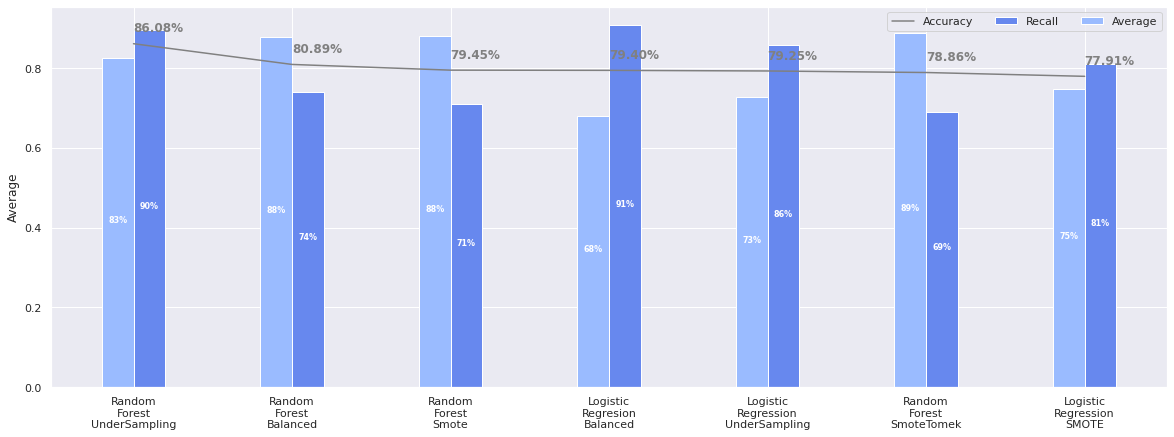

In [ ]:
x_axis = np.arange(len(metricas['Modelo']))
figure,ax=plt.subplots(figsize=(20,7))
ax.bar(x_axis +0.1, metricas['Recall'], width=0.2) 
ax.bar(x_axis -0.1, metricas['Accuracy'], width=0.2)
sns.lineplot(x = x_axis, y=metricas['Average'], data=metricas, color='gray')
plt.xticks(x_axis,metricas['Modelo'], rotation=90)

for i,j in enumerate(metricas['Average']):
  plt.text(i,j+.03, f'{j*100:.2f}%', color='grey', fontweight='bold')

for i,j in enumerate(metricas['Accuracy']):
  plt.text(i-0.1,j/2, f'{j*100:.0f}%', color='white', fontsize=8, fontweight='bold', ha='center')

for i,j in enumerate(metricas['Recall']):
  plt.text(i+0.1,j/2, f'{j*100:.0f}%', color='white', fontsize=8, fontweight='bold', ha='center')

ax.legend(['Accuracy','Recall','Average'], ncol=3)
wrap_labels(ax, 10)
plt.show()

El gráfico representa el average y el recall de la clase minoritaria, donde se observa que el modelo de Random Forest con el método de undersampling podría realizar las mejores predicciones. Por lo que nos decidimos a desarrollar este modelo, profundizando más en sus hiperparamétros para poder mejorar aun más los resultados.

# Tercera Entrega del Proyecto Final

In [ ]:
## A partir de la elección anterior desarrollaremos el mejor modelo posible.
## primero encontraremos los mejores parametros a partir del anterior.
#Modelo anterior: model3 = RandomForestClassifier(random_state=11, n_estimators=500, max_depth=15,
#                                max_features="sqrt",
#                                max_samples=2/3, 
#                                oob_score=True)
#model3.fit(X_train_res3, y_train_res3.yes)

############ Lineas comentadas para darle fluidez al modelo    ####################
#param_grid = {'n_estimators':[100, 200, 500, 1000, 1500], 
#                'max_depth':[5, 7,10, 13, 15],
#                'class_weight':["balanced","balanced_subsample"], 
#                'max_features':["sqrt", 'log2'], 
#                'max_samples':[2/3, 1/2, 1/4], 
#                'oob_score':[True, False]}

#cv= StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
#model = RandomizedSearchCV(rfc, param_grid, n_iter=100, random_state=0, cv=cv)
#model.fit(X_train_res3, y_train_res3)
#print("Mejores parametros: "+str(model.best_params_))
#print("Mejor Score: "+str(model.best_score_)+'\n')


Mejores parametros: {'oob_score': False, 'n_estimators': 200, 'max_samples': 0.5, 'max_features': 'log2', 'max_depth': 15, 'class_weight': 'balanced_subsample'}
Mejor Score: 0.8524639877306797



Mejores parametros: {'oob_score': False, 'n_estimators': 200, 'max_samples': 0.5, 'max_features': 'log2', 'max_depth': 15, 'class_weight': 'balanced_subsample'}
Mejor Score: 0.8524639877306797

In [ ]:
X = df.drop(columns=["y"])
y = df.y
enc = OrdinalEncoder()
edu=['unknown','primary', 'secondary','tertiary']
mes=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov','dec']
enc = OrdinalEncoder(categories=[edu, mes])
pd.DataFrame(enc.fit_transform(X[['education', 'month']]))
X[['education', 'month']]=enc.fit_transform(X[['education','month']])
le = preprocessing.LabelEncoder()
X.job=le.fit_transform(df['job'])
X.marital=le.fit_transform(df['marital'])
X.contact=le.fit_transform(df['contact'])
X.poutcome=le.fit_transform(df['poutcome'])
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.yes)

In [ ]:
model3 = RandomForestClassifier(random_state=11, n_estimators=200, max_depth=15,
                                max_features='log2',
                                max_samples=2/4, 
                                oob_score=False, class_weight='balanced_subsample')
model3.fit(X_train_res3, y_train_res3.yes)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features='log2', max_samples=0.5, n_estimators=200,
                       random_state=11)

In [ ]:
y_test_pred = model3.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

y_train_pred = model3.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

print('% de aciertos sobre el set de evaluación:',test_accuracy)
# Matriz de Confusion
cm = confusion_matrix(y_test,y_test_pred)
print("Matriz de confusión:")
print(cm)

% de aciertos sobre el set de entrenamiento: 0.8526242613833854
% de aciertos sobre el set de evaluación: 0.8249041580654675
Matriz de confusión:
[[9773 2196]
 [ 179 1416]]


### Importancia de las variables 
Guardamos en un dataframe la importancia de las variables en la predicción

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': model3.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
vis = importancia_predictores.sort_values(by='importancia', ascending=False)
vis

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,duration,0.391060
7,month,0.078440
4,balance,0.078354
0,age,0.077231
6,day,0.068687
5,contact,0.048568
10,pdays,0.041572
14,housing_yes,0.037862
1,job,0.036266
12,poutcome,0.035332


Se puede observar que básicamente la variable mas influyente es la duración de las llamadas en la campaña, por lo que podemos despreciar algunas variables. entonces nos quedamos con las primeras 5 para poder visualizarlas mejor

In [ ]:
vis = vis[:5]
vis

,predictor,importancia
8,duration,0.391060
7,month,0.078440
4,balance,0.078354
0,age,0.077231
6,day,0.068687


Graficamos las variables para observar el grado de importancia en nuestro modelo

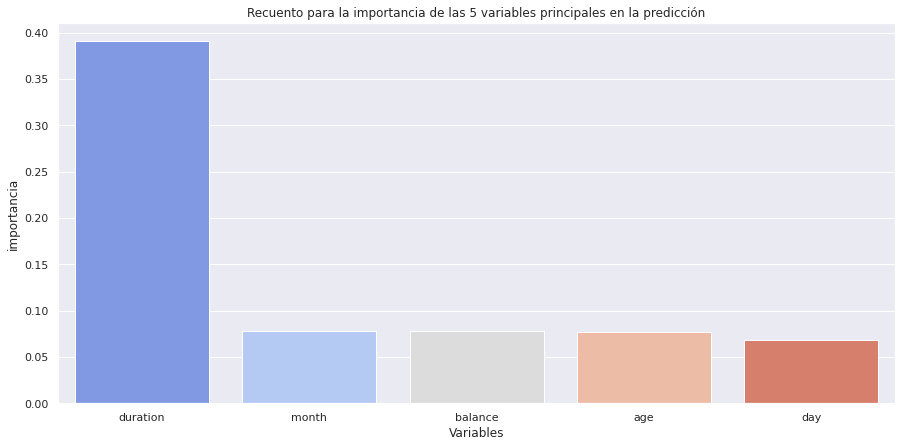

In [ ]:
figure,ax=plt.subplots(figsize=(15,7))
sns.barplot(x='predictor' ,y='importancia', data=vis, palette='coolwarm')
ax.set_xlabel('Variables')
ax.set_title('Recuento para la importancia de las 5 variables principales en la predicción')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

# Matriz de Confusión

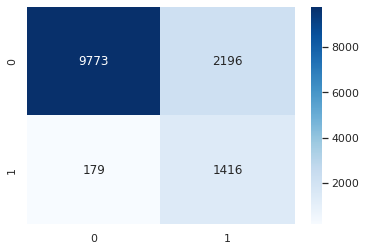

In [ ]:
#Matriz de Confusión Tree decision Classifier
cm_test=confusion_matrix(y_test, y_test_pred)

#Ploteamos la Matriz
sns.heatmap(cm_test, cmap='Blues', annot=True, fmt='.0f')
plt.show()

Para poder interpretar la matriz podemos nombrar los cuatro campos: 

Primer cuadrado(no - no ) como **A1**(9773) (TN)

Segundo cuadrado (no - yes) como **A2**(2196) (FP)

Tercer cuadrado(yes - no) como **B1**(179) (FN)

Cuarto cuadrado(yes - yes) como **B2**(1416) (TP)


La diagonal **A1 B2** representan los valores estimados de forma correcta, o sea que el modelo predijo correctamente  9773 usuarios que no depositaron dinero en plazo fijo y 1416 que si lo hicieron. estos se llaman verdaderos positivos y verdaderos negativos.
Respecto a **A2** son falsos positivos y **B1** falsos negativos.
Ahora sabiendo esto podemos reveer las métricas.

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
test_precision = precision_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_recall_score = recall_score(y_test, y_test_pred)

print("% Score de precisión del clasificador:",test_precision)
print("% Score de f1 del clasificador:",test_f1_score)
print("% Score de recall del clasificador:",test_recall_score)



#y_test_pred = model.predict(X_test)
#test_accuracy = accuracy_score(y_test, y_test_pred)

#print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% Score de precisión del clasificador: 0.3920265780730897
% Score de f1 del clasificador: 0.5438832341079316
% Score de recall del clasificador: 0.8877742946708463


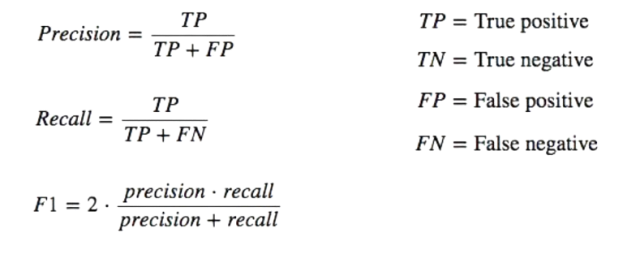

La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP). 
El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).
La puntuación F1 es la media armónica de precisión y el recall. Se encuentra entre [0,1].

Puntos a mejorar: la precisión es casi del 50% por lo que tendriamos que mejorar la predicción de falsos positivos.

El recall de nuestro modelo a pesar de no ser tan alto tiene pocos falsos negativos y para el planteo económico de la campaña no genera un problema.



# Curva ROC

AUC para nuestro modelo es: 0.9194467630721056


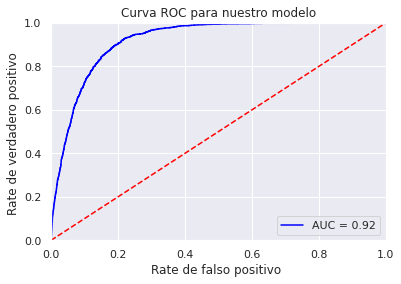

In [ ]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model3.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC para nuestro modelo es: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Curva ROC para nuestro modelo')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Rate de verdadero positivo ')
plt.xlabel('Rate de falso positivo ')
plt.show()

Un clasificador excelente tiene un valor AUC cercano a 1, mientras que un clasificador de bajo rendimiento tiene un valor AOC cercano a 0. Un clasificador con una puntuación AOC de 0.5 no tiene ninguna capacidad de separación de clases.

# Conclusión